In [1]:
import pandas as pd
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout,Flatten,average
from keras.models import Sequential
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
## Load_data
file = files.upload()
data_Main = pd.read_csv('data.csv')

Saving data.csv to data.csv


In [47]:
## Preproccesing_data
data = data_Main

data = data.drop(columns='date')
data['price'] = data['price'].replace([0],np.mean(data['price']))

street_name = data['street'].to_numpy()
count = data['street'].value_counts()
threshold = 1
mask = data['street'].isin(count[count > threshold].index)
data['street'][~mask] = "others"
data= pd.get_dummies(data, columns=['street'])

city_name = data['city'].to_numpy()
data= pd.get_dummies(data, columns=['city'])

statezip_name = data['statezip'].to_numpy()
data= pd.get_dummies(data, columns=['statezip'])


country_name = data['country'].to_numpy()
data = pd.get_dummies(data, columns=['country'])

data = data.to_numpy()
data = normalize(data,norm='max',axis=0)

## Splite_data
x_train, x_test, y_train, y_test = train_test_split(data[:,1:],data[:,0],test_size=0.2,random_state=42)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [5]:
## 1
## create_Model
model = Sequential()
model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))
model.compile(optimizer= 'adam', loss= 'MSE', metrics=['mse','mae'])

In [6]:
#Train_Model
trainedModel = model.fit(x_train,y_train,batch_size=64,epochs=20,validation_split=0.15)

Epoch 1/20
49/49 [==============================] - 1s 13ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0362 - val_loss: 7.9037e-05 - val_mse: 7.9037e-05 - val_mae: 0.0062
Epoch 2/20
49/49 [==============================] - 1s 11ms/step - loss: 8.8464e-05 - mse: 8.8464e-05 - mae: 0.0056 - val_loss: 4.5579e-05 - val_mse: 4.5579e-05 - val_mae: 0.0046
Epoch 3/20
49/49 [==============================] - 1s 11ms/step - loss: 6.6934e-05 - mse: 6.6934e-05 - mae: 0.0046 - val_loss: 3.8554e-05 - val_mse: 3.8554e-05 - val_mae: 0.0043
Epoch 4/20
49/49 [==============================] - 1s 11ms/step - loss: 6.0881e-05 - mse: 6.0881e-05 - mae: 0.0045 - val_loss: 3.4740e-05 - val_mse: 3.4740e-05 - val_mae: 0.0040
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 5.4339e-05 - mse: 5.4339e-05 - mae: 0.0043 - val_loss: 3.1746e-05 - val_mse: 3.1746e-05 - val_mae: 0.0039
Epoch 6/20
49/49 [==============================] - 1s 10ms/step - loss: 4.9228e-05 - mse: 4.9228e-05 - mae: 0.00

In [9]:
## Evaluate_Model
test_loss,test_mse,test_mae = model.evaluate(x_test,y_test, verbose = 0)
y_pred = model.predict(x_test)


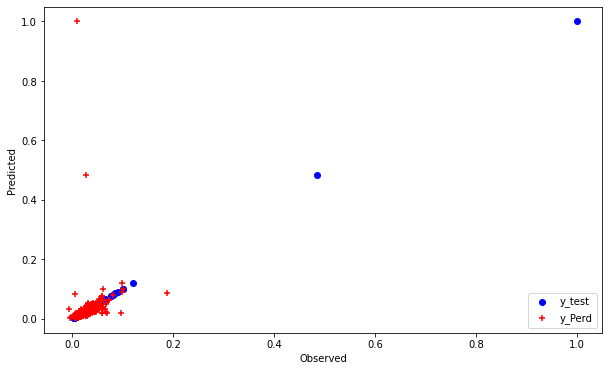

In [10]:
plt.figure(figsize=(10,6))

plt.scatter(y_test, y_test,marker = 'o', color='blue')
plt.scatter(y_pred, y_test,marker = '+', color='red')
plt.legend(['y_test','y_Perd'])
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()



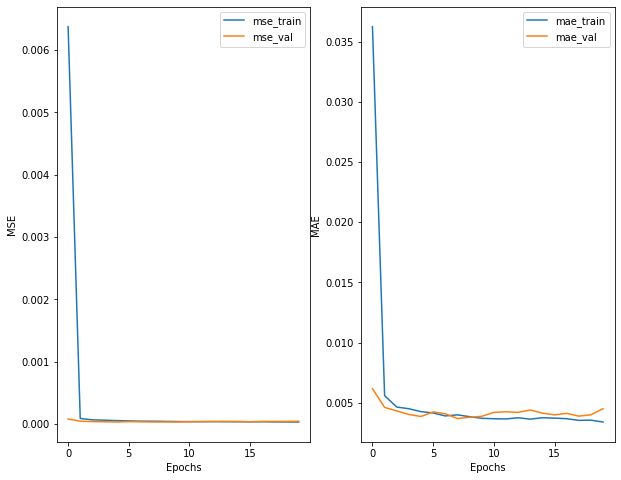

In [11]:
history = trainedModel.history

mse_train = history['mse']
mse_val = history['val_mse']
mae_train = history['mae']
mae_val = history['val_mae']

plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.plot(mse_train)
plt.plot(mse_val)
plt.legend(['mse_train','mse_val'])

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.plot(mae_train)
plt.plot(mae_val)
plt.legend(['mae_train','mae_val'])

In [32]:
## 2
## create_Model
model = Sequential()
model.add(Flatten())
model.add(Dense(2048,activation='sigmoid'))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer= 'adam', loss= 'MSE', metrics=['mse','mae'])

In [33]:
#Train_Model
trainedModel = model.fit(x_train,y_train,batch_size=64,epochs=20,validation_split=0.15)

Epoch 1/20
49/49 [==============================] - 2s 30ms/step - loss: 0.3482 - mse: 0.3482 - mae: 0.3814 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0633
Epoch 2/20
49/49 [==============================] - 1s 10ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0253 - val_loss: 1.6187e-04 - val_mse: 1.6187e-04 - val_mae: 0.0095
Epoch 3/20
49/49 [==============================] - 1s 10ms/step - loss: 2.0045e-04 - mse: 2.0045e-04 - mae: 0.0093 - val_loss: 1.3086e-04 - val_mse: 1.3086e-04 - val_mae: 0.0084
Epoch 4/20
49/49 [==============================] - 1s 10ms/step - loss: 1.7218e-04 - mse: 1.7218e-04 - mae: 0.0083 - val_loss: 1.1173e-04 - val_mse: 1.1173e-04 - val_mae: 0.0080
Epoch 5/20
49/49 [==============================] - 1s 10ms/step - loss: 1.4943e-04 - mse: 1.4943e-04 - mae: 0.0076 - val_loss: 9.1935e-05 - val_mse: 9.1935e-05 - val_mae: 0.0070
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 1.3113e-04 - mse: 1.3113e-04 - mae: 0.0070 - val_loss: 7

In [34]:
## Evaluate_Model
test_loss,test_mse,test_mae = model.evaluate(x_test,y_test, verbose = 0)
y_pred = model.predict(x_test)

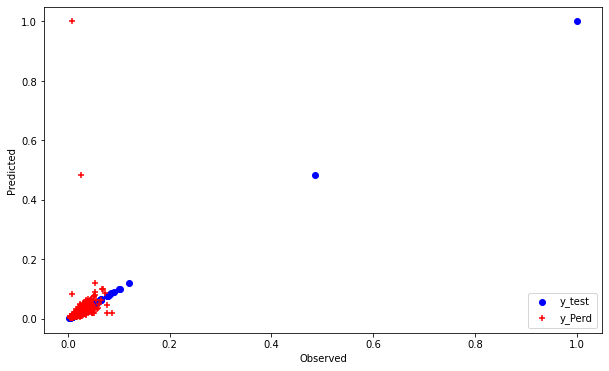

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test,marker = 'o', color='blue')
plt.scatter(y_pred, y_test,marker = '+', color='red')
plt.legend(['y_test','y_Perd'])
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

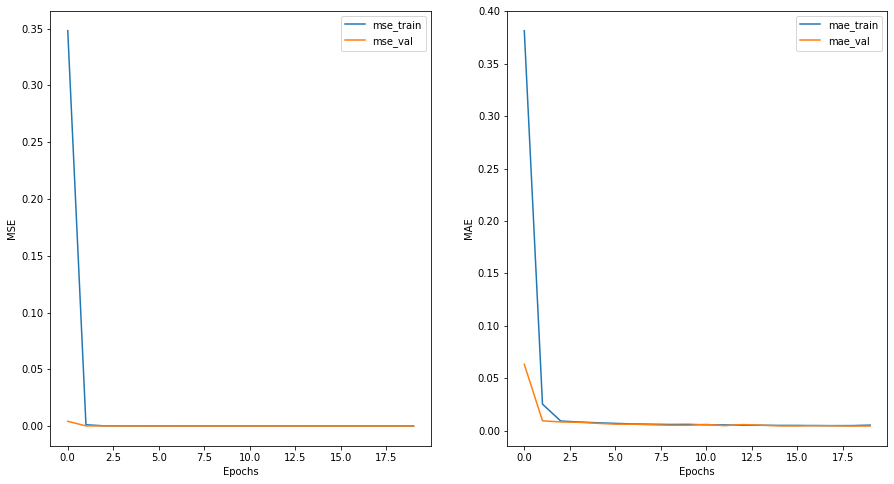

In [36]:
history = trainedModel.history

mse_train = history['mse']
mse_val = history['val_mse']
mae_train = history['mae']
mae_val = history['val_mae']

plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.plot(mse_train)
plt.plot(mse_val)
plt.legend(['mse_train','mse_val'])

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.plot(mae_train)
plt.plot(mae_val)
plt.legend(['mae_train','mae_val'])

In [21]:
## 3
## create_Model
model = Sequential()
model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))
model.compile(optimizer= 'adam', loss= 'MSE', metrics=['mse','mae'])

In [22]:
#Train_Model
trainedModel = model.fit(x_train,y_train,batch_size=64,epochs=20,validation_split=0.15)

Epoch 1/20
49/49 [==============================] - 2s 29ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0317 - val_loss: 6.7237e-05 - val_mse: 6.7237e-05 - val_mae: 0.0054
Epoch 2/20
49/49 [==============================] - 1s 28ms/step - loss: 7.9088e-05 - mse: 7.9088e-05 - mae: 0.0053 - val_loss: 3.5751e-05 - val_mse: 3.5751e-05 - val_mae: 0.0041
Epoch 3/20
49/49 [==============================] - 2s 35ms/step - loss: 6.1559e-05 - mse: 6.1559e-05 - mae: 0.0045 - val_loss: 4.2529e-05 - val_mse: 4.2529e-05 - val_mae: 0.0050
Epoch 4/20
49/49 [==============================] - 2s 31ms/step - loss: 5.3013e-05 - mse: 5.3013e-05 - mae: 0.0042 - val_loss: 3.1647e-05 - val_mse: 3.1647e-05 - val_mae: 0.0039
Epoch 5/20
49/49 [==============================] - 2s 47ms/step - loss: 4.8699e-05 - mse: 4.8699e-05 - mae: 0.0040 - val_loss: 4.9709e-05 - val_mse: 4.9709e-05 - val_mae: 0.0056
Epoch 6/20
49/49 [==============================] - 2s 43ms/step - loss: 4.4197e-05 - mse: 4.4197e-05 - mae: 0.00

In [23]:
## Evaluate_Model
test_loss,test_mse,test_mae = model.evaluate(x_test,y_test, verbose = 0)
y_pred = model.predict(x_test)


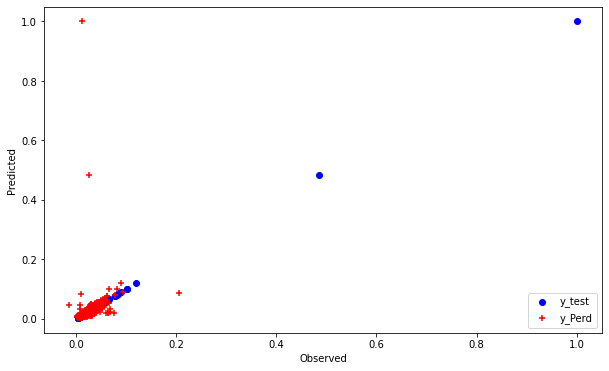

In [24]:
plt.figure(figsize=(10,6))

plt.scatter(y_test, y_test,marker = 'o', color='blue')
plt.scatter(y_pred, y_test,marker = '+', color='red')
plt.legend(['y_test','y_Perd'])
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()



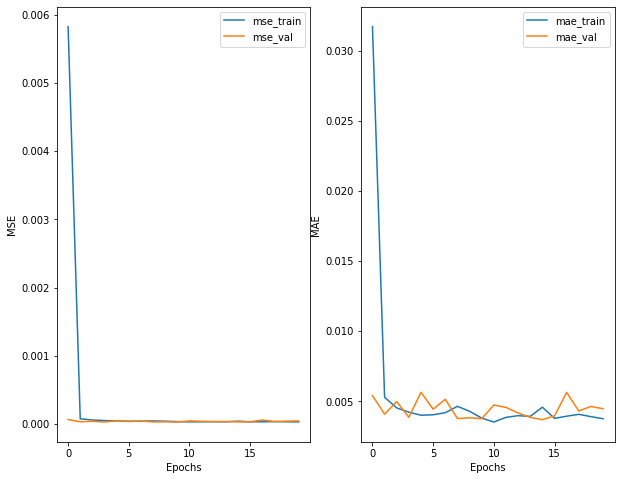

In [25]:
history = trainedModel.history

mse_train = history['mse']
mse_val = history['val_mse']
mae_train = history['mae']
mae_val = history['val_mae']

plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.plot(mse_train)
plt.plot(mse_val)
plt.legend(['mse_train','mse_val'])

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.plot(mae_train)
plt.plot(mae_val)
plt.legend(['mae_train','mae_val'])

In [27]:
## 4
## create_Model
model = Sequential()
model.add(Flatten())
model.add(Dense(2048,activation='sigmoid'))
model.add(Dense(512,activation='sigmoid'))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer= 'adam', loss= 'MSE', metrics=['mse','mae'])

In [28]:
#Train_Model
trainedModel = model.fit(x_train,y_train,batch_size=64,epochs=20,validation_split=0.15)

Epoch 1/20
49/49 [==============================] - 4s 53ms/step - loss: 0.2275 - mse: 0.2275 - mae: 0.3003 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0549
Epoch 2/20
49/49 [==============================] - 3s 56ms/step - loss: 7.5910e-04 - mse: 7.5910e-04 - mae: 0.0205 - val_loss: 1.6306e-04 - val_mse: 1.6306e-04 - val_mae: 0.0082
Epoch 3/20
49/49 [==============================] - 2s 37ms/step - loss: 2.0040e-04 - mse: 2.0040e-04 - mae: 0.0089 - val_loss: 1.5541e-04 - val_mse: 1.5541e-04 - val_mae: 0.0085
Epoch 4/20
49/49 [==============================] - 1s 26ms/step - loss: 1.9783e-04 - mse: 1.9783e-04 - mae: 0.0087 - val_loss: 1.5284e-04 - val_mse: 1.5284e-04 - val_mae: 0.0084
Epoch 5/20
49/49 [==============================] - 1s 25ms/step - loss: 1.9502e-04 - mse: 1.9502e-04 - mae: 0.0087 - val_loss: 1.5114e-04 - val_mse: 1.5114e-04 - val_mae: 0.0086
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 1.9320e-04 - mse: 1.9320e-04 - mae: 0.0087 - val

In [29]:
## Evaluate_Model
test_loss,test_mse,test_mae = model.evaluate(x_test,y_test, verbose = 0)
y_pred = model.predict(x_test)


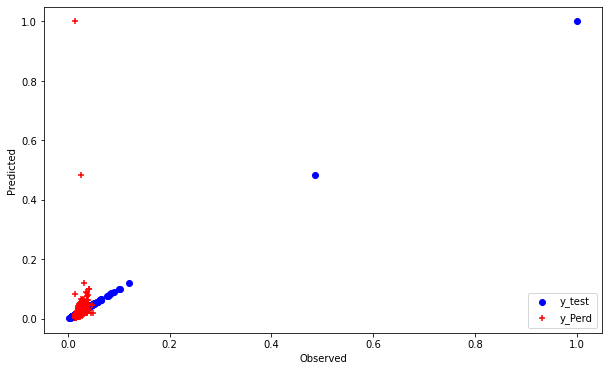

In [30]:
plt.figure(figsize=(10,6))

plt.scatter(y_test, y_test,marker = 'o', color='blue')
plt.scatter(y_pred, y_test,marker = '+', color='red')
plt.legend(['y_test','y_Perd'])
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()



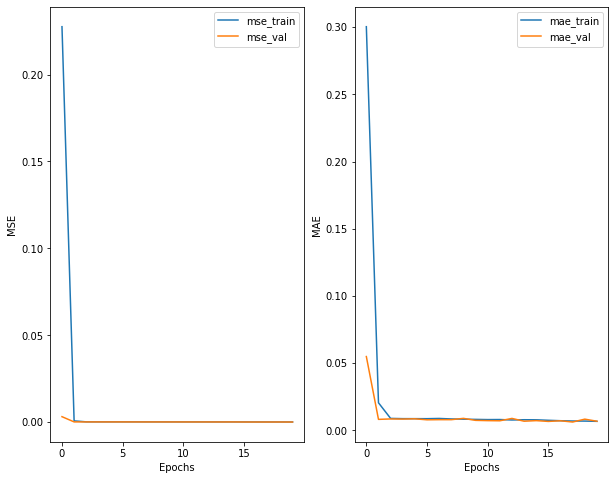

In [31]:
history = trainedModel.history

mse_train = history['mse']
mse_val = history['val_mse']
mae_train = history['mae']
mae_val = history['val_mae']

plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.plot(mse_train)
plt.plot(mse_val)
plt.legend(['mse_train','mse_val'])

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.plot(mae_train)
plt.plot(mae_val)
plt.legend(['mae_train','mae_val'])

## Loss_Function = MSE

In [43]:
## create_Model
model = Sequential()
model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))
model.compile(optimizer= 'adam', loss= 'MSE', metrics=['mse','mae'])

In [44]:
#Train_Model
trainedModel = model.fit(x_train,y_train,batch_size=64,epochs=20,validation_split=0.15)

Epoch 1/20
49/49 [==============================] - 2s 29ms/step - loss: 0.0124 - mse: 0.0124 - mae: 0.0420 - val_loss: 1.0731e-04 - val_mse: 1.0731e-04 - val_mae: 0.0077
Epoch 2/20
49/49 [==============================] - 1s 25ms/step - loss: 8.7417e-05 - mse: 8.7417e-05 - mae: 0.0060 - val_loss: 6.3989e-05 - val_mse: 6.3989e-05 - val_mae: 0.0058
Epoch 3/20
49/49 [==============================] - 1s 26ms/step - loss: 6.5667e-05 - mse: 6.5667e-05 - mae: 0.0049 - val_loss: 6.2234e-05 - val_mse: 6.2234e-05 - val_mae: 0.0057
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 6.0042e-05 - mse: 6.0042e-05 - mae: 0.0048 - val_loss: 4.1445e-05 - val_mse: 4.1445e-05 - val_mae: 0.0045
Epoch 5/20
49/49 [==============================] - 1s 25ms/step - loss: 5.2335e-05 - mse: 5.2335e-05 - mae: 0.0044 - val_loss: 3.8235e-05 - val_mse: 3.8235e-05 - val_mae: 0.0042
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 4.5301e-05 - mse: 4.5301e-05 - mae: 0.00

In [40]:
## Evaluate_Model
test_loss,test_mse,test_mae = model.evaluate(x_test,y_test, verbose = 0)
y_pred = model.predict(x_test)


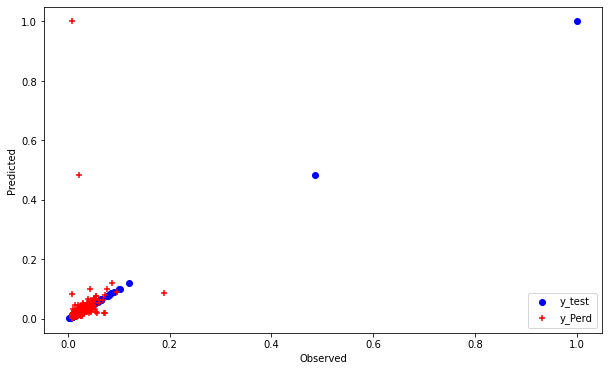

In [45]:
plt.figure(figsize=(10,6))

plt.scatter(y_test, y_test,marker = 'o', color='blue')
plt.scatter(y_pred, y_test,marker = '+', color='red')
plt.legend(['y_test','y_Perd'])
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()



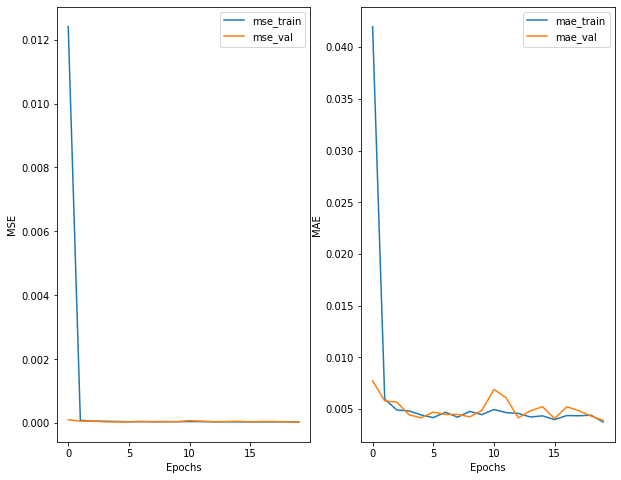

In [46]:
history = trainedModel.history

mse_train = history['mse']
mse_val = history['val_mse']
mae_train = history['mae']
mae_val = history['val_mae']

plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.plot(mse_train)
plt.plot(mse_val)
plt.legend(['mse_train','mse_val'])

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.plot(mae_train)
plt.plot(mae_val)
plt.legend(['mae_train','mae_val'])

## Loss_Function = MAE

In [50]:
## create_Model
model = Sequential()
model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))
model.compile(optimizer= 'adam', loss= 'MAE', metrics=['mse','mae'])

In [51]:
#Train_Model
trainedModel = model.fit(x_train,y_train,batch_size=64,epochs=20,validation_split=0.15)

Epoch 1/20
49/49 [==============================] - 4s 55ms/step - loss: 0.0393 - mse: 0.0093 - mae: 0.0393 - val_loss: 0.0055 - val_mse: 6.4349e-05 - val_mae: 0.0055
Epoch 2/20
49/49 [==============================] - 2s 48ms/step - loss: 0.0062 - mse: 9.3734e-05 - mae: 0.0062 - val_loss: 0.0049 - val_mse: 4.8870e-05 - val_mae: 0.0049
Epoch 3/20
49/49 [==============================] - 2s 32ms/step - loss: 0.0058 - mse: 8.1728e-05 - mae: 0.0058 - val_loss: 0.0048 - val_mse: 5.2378e-05 - val_mae: 0.0048
Epoch 4/20
49/49 [==============================] - 1s 24ms/step - loss: 0.0049 - mse: 6.5889e-05 - mae: 0.0049 - val_loss: 0.0045 - val_mse: 3.6658e-05 - val_mae: 0.0045
Epoch 5/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0045 - mse: 5.9638e-05 - mae: 0.0045 - val_loss: 0.0041 - val_mse: 3.4540e-05 - val_mae: 0.0041
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0043 - mse: 5.2608e-05 - mae: 0.0043 - val_loss: 0.0040 - val_mse: 3.8568e

In [52]:
## Evaluate_Model
test_loss,test_mse,test_mae = model.evaluate(x_test,y_test, verbose = 0)
y_pred = model.predict(x_test)


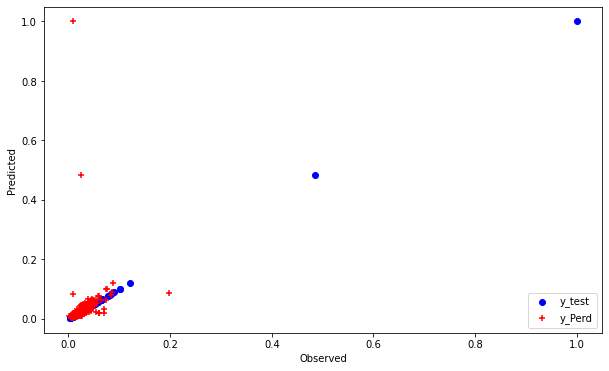

In [53]:
plt.figure(figsize=(10,6))

plt.scatter(y_test, y_test,marker = 'o', color='blue')
plt.scatter(y_pred, y_test,marker = '+', color='red')
plt.legend(['y_test','y_Perd'])
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()



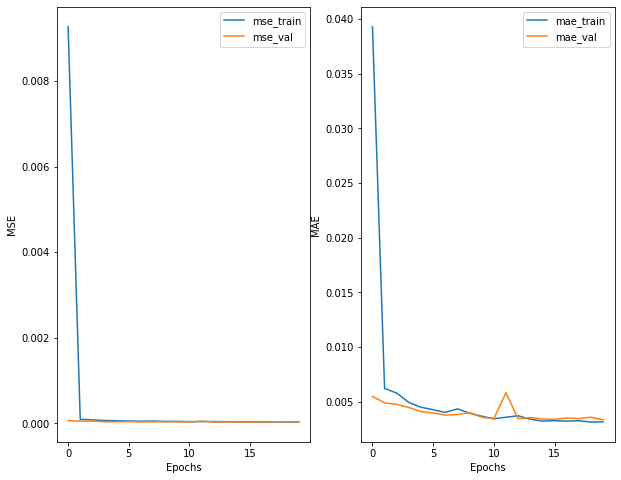

In [54]:
history = trainedModel.history

mse_train = history['mse']
mse_val = history['val_mse']
mae_train = history['mae']
mae_val = history['val_mae']

plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.plot(mse_train)
plt.plot(mse_val)
plt.legend(['mse_train','mse_val'])

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.plot(mae_train)
plt.plot(mae_val)
plt.legend(['mae_train','mae_val'])